# Redistributions

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import tensorcraft as tc
import matplotlib.pyplot as plt

## AllGather

MultiAxisDist(torch.Size([3, 2, 2]), ((0, 1), (2,)), (2, 2))


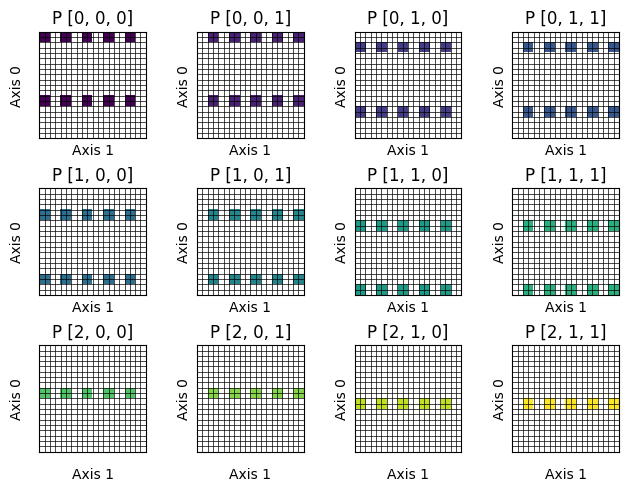

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)


### all axis

MultiAxisDist(torch.Size([3, 2, 2]), ((), ()), (0, 0))
tensor(36.6667)


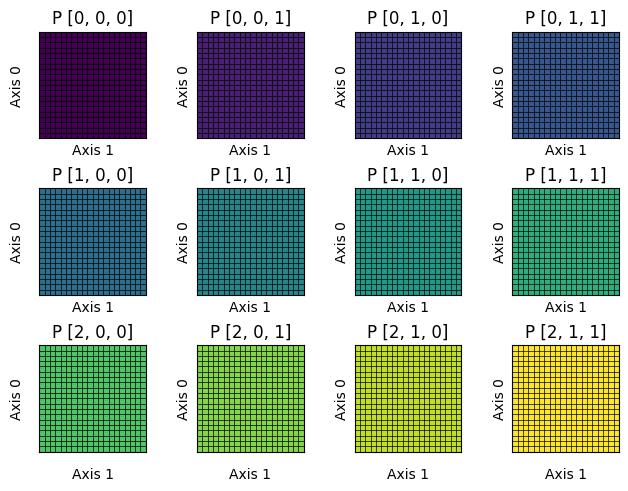

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=None)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 0

Mesh axis idx: 0
MultiAxisDist(torch.Size([3, 2, 2]), ((1,), (2,)), [2, 2])
tensor(26.6667)


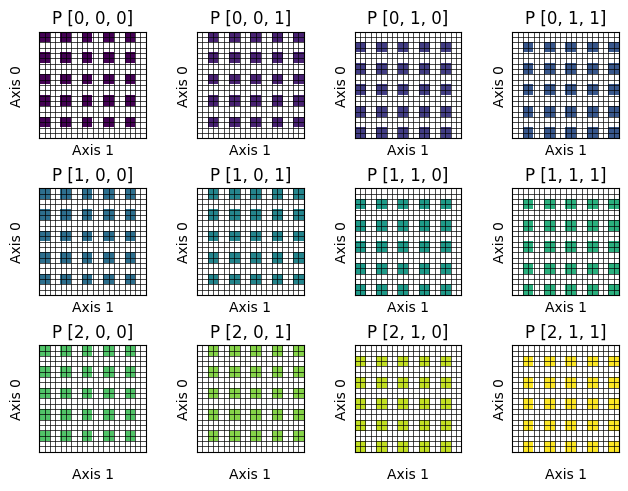

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=0)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 1

Mesh axis idx: 1
MultiAxisDist(torch.Size([3, 2, 2]), ((0,), (2,)), [4, 2])
tensor(20.)


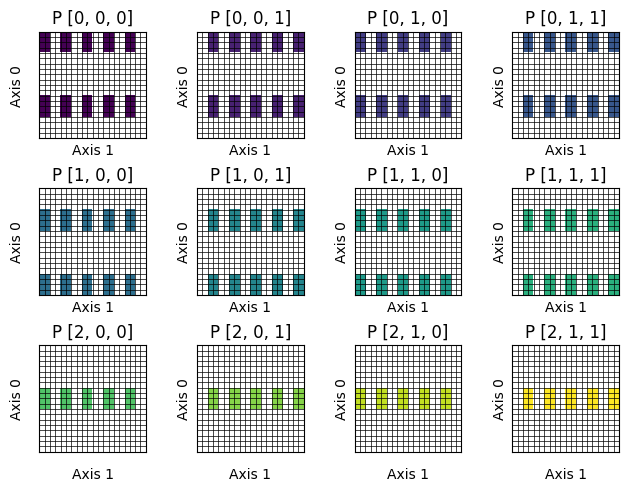

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=1)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 2

Mesh axis idx: 0
MultiAxisDist(torch.Size([3, 2, 2]), ((0, 1), ()), [2, 2])
tensor(20.)


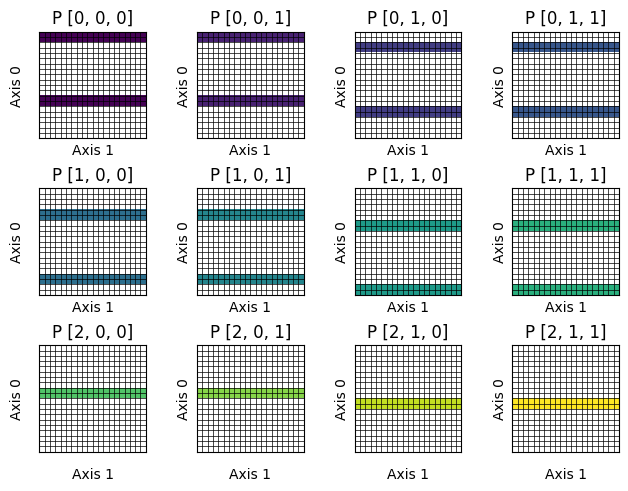

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=2)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

## Split

MultiAxisDist(torch.Size([2, 2, 2]), ((), ()), (1, 1))


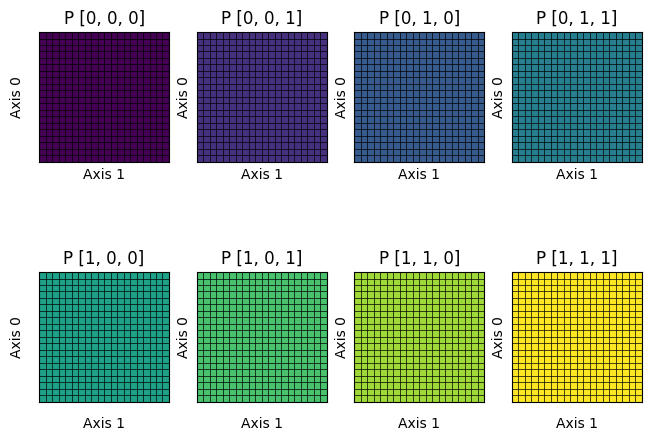

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

0


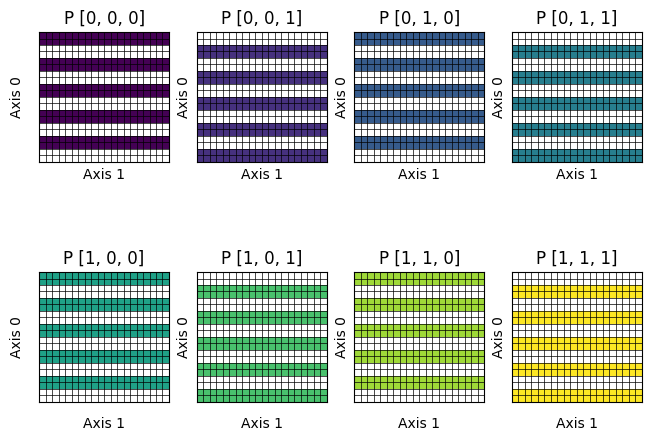

In [ ]:
new_dist, cost = dist.split(tensor_shape, tensor_axis=0, mesh_dims=2, block_size=2)
print(cost)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)


0


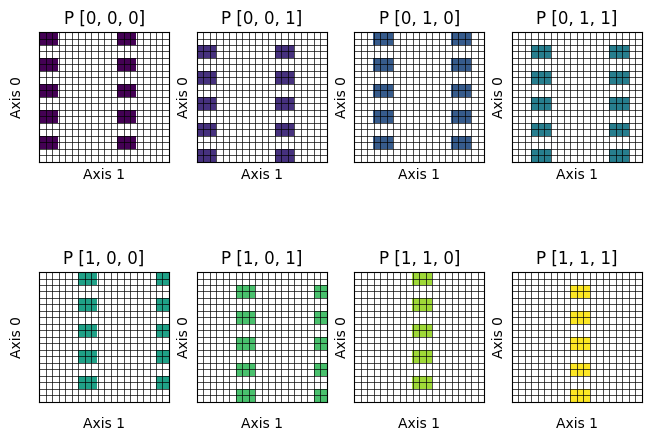

In [ ]:
new_new_dist, cost = new_dist.split(tensor_shape, tensor_axis=1, mesh_dims=(0,1), block_size=3)
print(cost)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

0
MultiAxisDist(torch.Size([2, 2, 2]), ((0, 1, 2), ()), (2, 1))


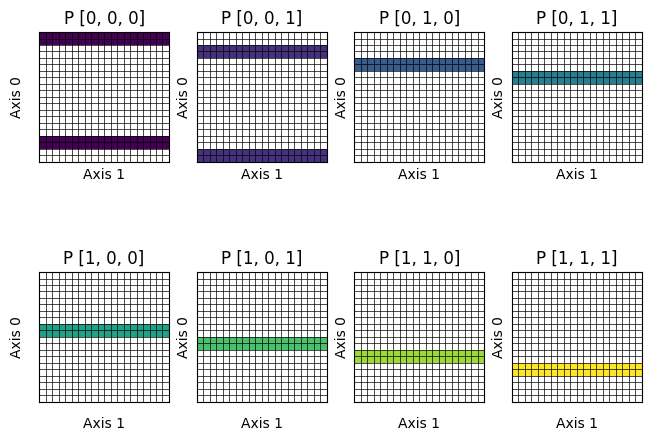

In [ ]:
new_new_dist, cost = new_dist.split(tensor_shape, tensor_axis=0, mesh_dims=(0,1), block_size=1)
print(cost)
print(new_new_dist)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

## All2All

MultiAxisDist(torch.Size([2, 2, 2]), ((0,), ()), (10, 10))


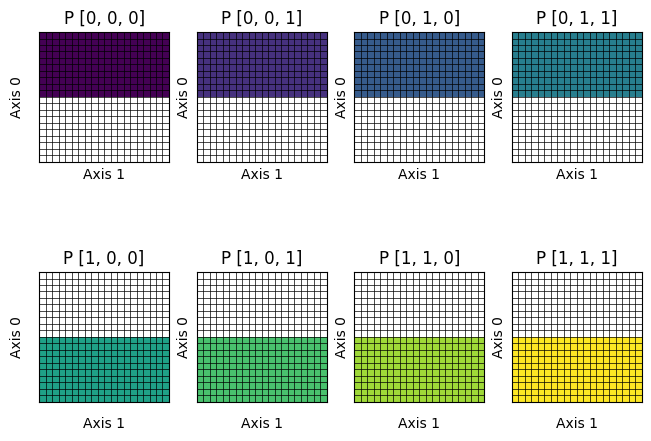

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 10)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

tensor(200, dtype=torch.int32)
MultiAxisDist(torch.Size([2, 2, 2]), ((), (0,)), (10, 10))
tensor(100.)


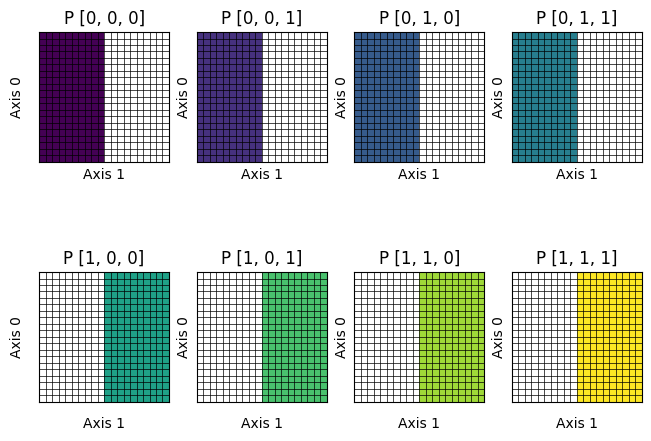

In [ ]:
new_dist, cost = dist.all2all(tensor_shape, 0, 1)
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

MultiAxisDist(torch.Size([3, 2]), ((0, 1), ()), (1, 1))


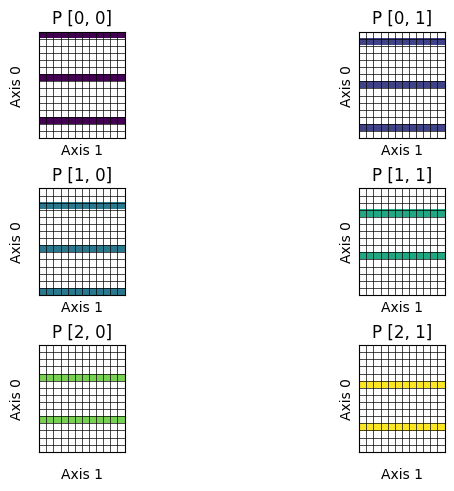

In [ ]:
tensor_shape = torch.Size([15, 12])
mesh = torch.Size([3,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), ()), (1,1))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

tensor(36, dtype=torch.int32)
MultiAxisDist(torch.Size([3, 2]), ((), (0, 1)), (1, 1))
tensor(30.)


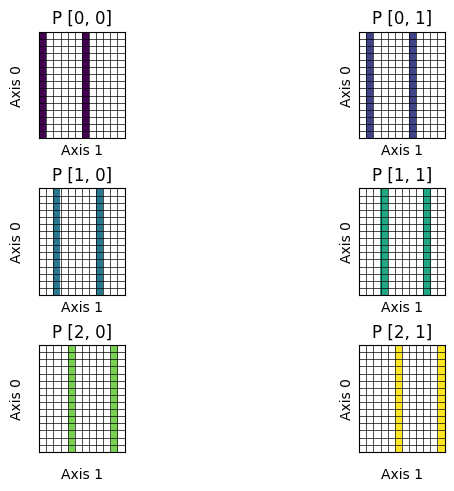

In [ ]:
new_dist, cost = dist.all2all(tensor_shape, 0, 1)
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

## Permute

MultiAxisDist(torch.Size([3, 3]), ((0, 1), ()), (2, 2))


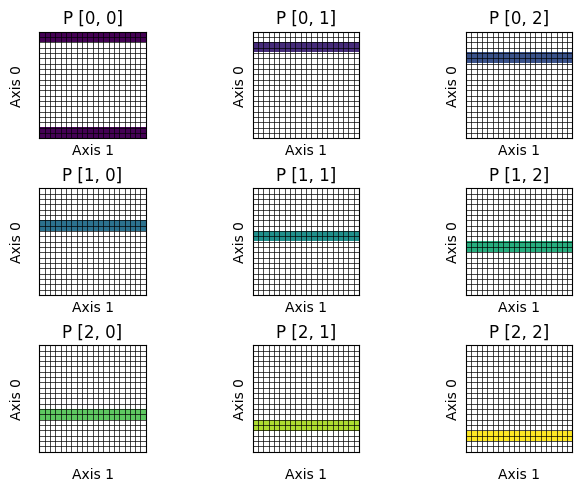

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,3])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), ()), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

[1, 0]
((1, 0), ())
MultiAxisDist(torch.Size([3, 3]), ((1, 0), ()), (2, 2))
tensor(80, dtype=torch.int32)


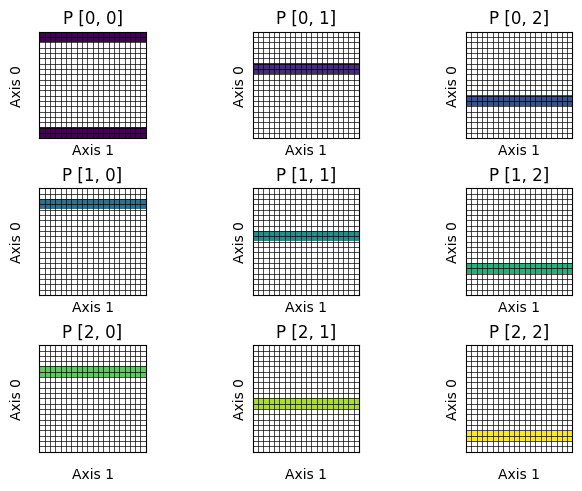

In [ ]:
new_dist, cost = dist.permute(tensor_shape, [0,1])
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

MultiAxisDist(torch.Size([2, 2]), ((0,), ()), (1, 1))


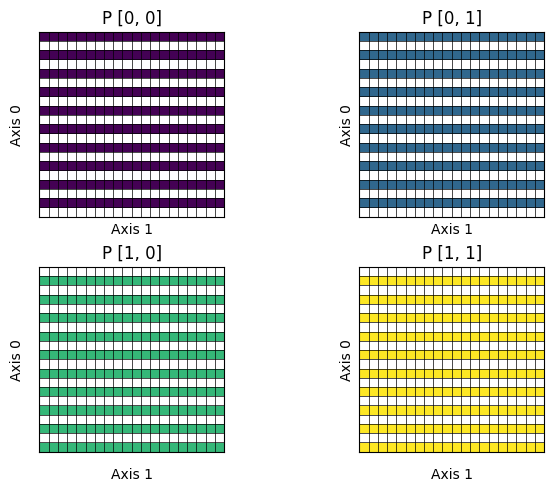

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)